<h1><b>Diamond price prediciton</b></h1>

<h1><b>Libs Importing</b></h1>

In [1]:
# Install AutoGluon.
# AutoGluon is used in AutoML.

!pip install -U pip
!pip install -U setuptools wheel

!pip install torch==2.1.2 torchvision==0.16.2 --index-url https://download.pytorch.org/whl/cpu

!pip install autogluon

  Using cached setuptools-69.5.1-py3-none-any.whl.metadata (6.2 kB)
Using cached setuptools-69.5.1-py3-none-any.whl (894 kB)
  Attempting uninstall: setuptools
    Found existing installation: setuptools 60.2.0
    Uninstalling setuptools-60.2.0:
      Successfully uninstalled setuptools-60.2.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
ipython 7.34.0 requires jedi>=0.16, which is not installed.
autogluon-core 1.1.0 requires scikit-learn<1.4.1,>=1.3.0, but you have scikit-learn 1.2.2 which is incompatible.
autogluon-features 1.1.0 requires scikit-learn<1.4.1,>=1.3.0, but you have scikit-learn 1.2.2 which is incompatible.
autogluon-multimodal 1.1.0 requires scikit-learn<1.4.1,>=1.3.0, but you have scikit-learn 1.2.2 which is incompatible.
autogluon-tabular 1.1.0 requires scikit-learn<1.4.1,>=1.3.0, but you have scikit-learn 1.2.2 which is incompatible.
open

Looking in indexes: https://download.pytorch.org/whl/cpu
  Using cached scikit_learn-1.4.0-1-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (11 kB)
  Using cached setuptools-60.2.0-py3-none-any.whl.metadata (5.1 kB)
Using cached scikit_learn-1.4.0-1-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (12.1 MB)
Using cached setuptools-60.2.0-py3-none-any.whl (953 kB)
  Attempting uninstall: setuptools
    Found existing installation: setuptools 69.5.1
    Uninstalling setuptools-69.5.1:
      Successfully uninstalled setuptools-69.5.1
  Attempting uninstall: scikit-learn
    Found existing installation: scikit-learn 1.2.2
    Uninstalling scikit-learn-1.2.2:
      Successfully uninstalled scikit-learn-1.2.2
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
ipython 7.34.0 requires jedi>=0.16, which is not installed.
cvxpy 1.3.4 requires 

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

<h1><b>EDA</b></h1>

<h3>read and investigation

In [3]:
# Load the data
df = pd.read_csv('train.csv')
df.head()

,Id,carat,cut,color,clarity,depth,table,price,x,y,z
0,1,1.06,Ideal,I,SI2,61.8,57.0,4270,6.57,6.60,4.07
1,2,1.51,Premium,G,VVS2,60.9,58.0,15164,7.38,7.42,4.51
2,3,0.32,Ideal,F,VS2,61.3,56.0,828,4.43,4.41,2.71
3,4,0.53,Ideal,G,VS2,61.2,56.0,1577,5.19,5.22,3.19
4,5,0.70,Premium,H,VVS2,61.0,57.0,2596,5.76,5.72,3.50


In [4]:
df.drop("Id",inplace=True,axis=1)
df.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,1.06,Ideal,I,SI2,61.8,57.0,4270,6.57,6.60,4.07
1,1.51,Premium,G,VVS2,60.9,58.0,15164,7.38,7.42,4.51
2,0.32,Ideal,F,VS2,61.3,56.0,828,4.43,4.41,2.71
3,0.53,Ideal,G,VS2,61.2,56.0,1577,5.19,5.22,3.19
4,0.70,Premium,H,VVS2,61.0,57.0,2596,5.76,5.72,3.50


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43152 entries, 0 to 43151
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   carat    43152 non-null  float64
 1   cut      43152 non-null  object 
 2   color    43152 non-null  object 
 3   clarity  43152 non-null  object 
 4   depth    43152 non-null  float64
 5   table    43152 non-null  float64
 6   price    43152 non-null  int64  
 7   x        43152 non-null  float64
 8   y        43152 non-null  float64
 9   z        43152 non-null  float64
dtypes: float64(6), int64(1), object(3)
memory usage: 3.3+ MB


Note : There are 3 Categorical columns (cut-color-clarity)

In [6]:
#some colors for Visualzations
colors = ['Cyan','yellowgreen', 'lightcoral', 'lightskyblue','gold','brown', 'g', 'y', 'b', 'r', 'purple', 'orange', 'pink', 'cyan', 'magenta']

In [7]:
cut_count = df["cut"].value_counts()
cut_count

cut
Ideal        17203
Premium      11113
Very Good     9658
Good          3881
Fair          1297
Name: count, dtype: int64

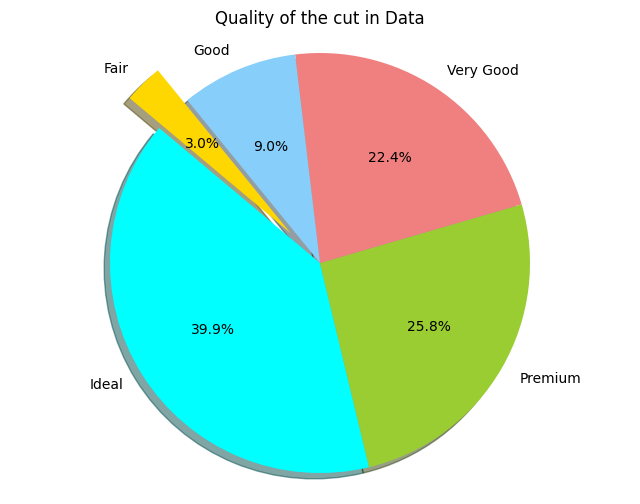

In [8]:
explode = (0, 0, 0, 0, 0.2)  # Explode 2nd slice

plt.figure(figsize=(8, 6))  # Adjust size if needed
plt.pie(cut_count.values, explode=explode, labels=cut_count.index, colors=colors[:len(cut_count)], autopct='%1.1f%%', shadow=True, startangle=140)

plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.title('Quality of the cut in Data')
plt.show()


Note: unbalanced quality of the cut

In [9]:
color_count = df["color"].value_counts()
color_count

color
G    9060
E    7832
F    7633
H    6651
D    5421
I    4265
J    2290
Name: count, dtype: int64

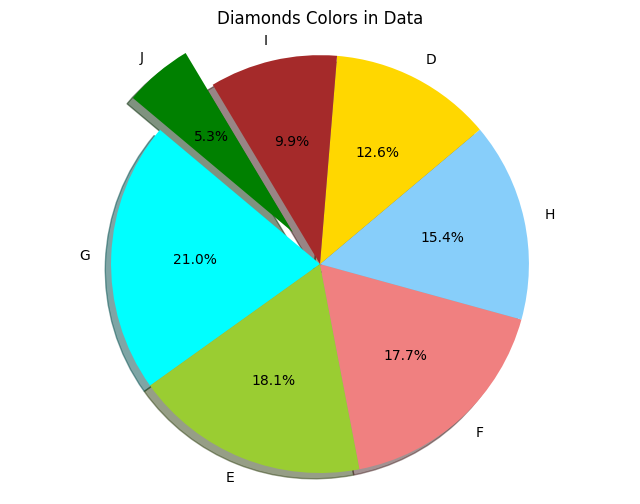

In [10]:
explode = (0, 0, 0, 0, 0, 0, 0.2)  # Explode 2nd slice

plt.figure(figsize=(8, 6))  # Adjust size if needed
plt.pie(color_count.values, explode=explode, labels=color_count.index, colors=colors[:len(color_count)], autopct='%1.1f%%', shadow=True, startangle=140)

plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.title('Diamonds Colors in Data')
plt.show()

In [11]:
clarity_count = df["clarity"].value_counts()
clarity_count

clarity
SI1     10428
VS2      9824
SI2      7432
VS1      6475
VVS2     4041
VVS1     2904
IF       1442
I1        606
Name: count, dtype: int64

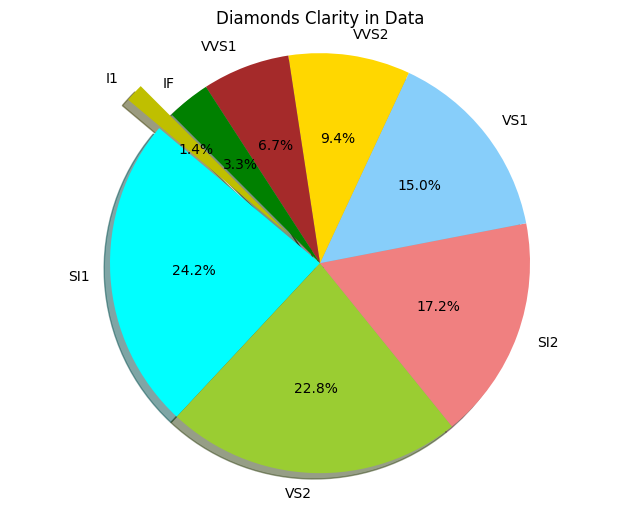

In [12]:
explode = (0, 0, 0, 0, 0, 0, 0, 0.2)  # Explode 2nd slice

plt.figure(figsize=(8, 6))  # Adjust size if needed
plt.pie(clarity_count.values, explode=explode, labels=clarity_count.index, colors=colors[:len(clarity_count)], autopct='%1.1f%%', shadow=True, startangle=140)

plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.title('Diamonds Clarity in Data')
plt.show()

Note: unbalanced Diamonds Colors and that is normal

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43152 entries, 0 to 43151
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   carat    43152 non-null  float64
 1   cut      43152 non-null  object 
 2   color    43152 non-null  object 
 3   clarity  43152 non-null  object 
 4   depth    43152 non-null  float64
 5   table    43152 non-null  float64
 6   price    43152 non-null  int64  
 7   x        43152 non-null  float64
 8   y        43152 non-null  float64
 9   z        43152 non-null  float64
dtypes: float64(6), int64(1), object(3)
memory usage: 3.3+ MB


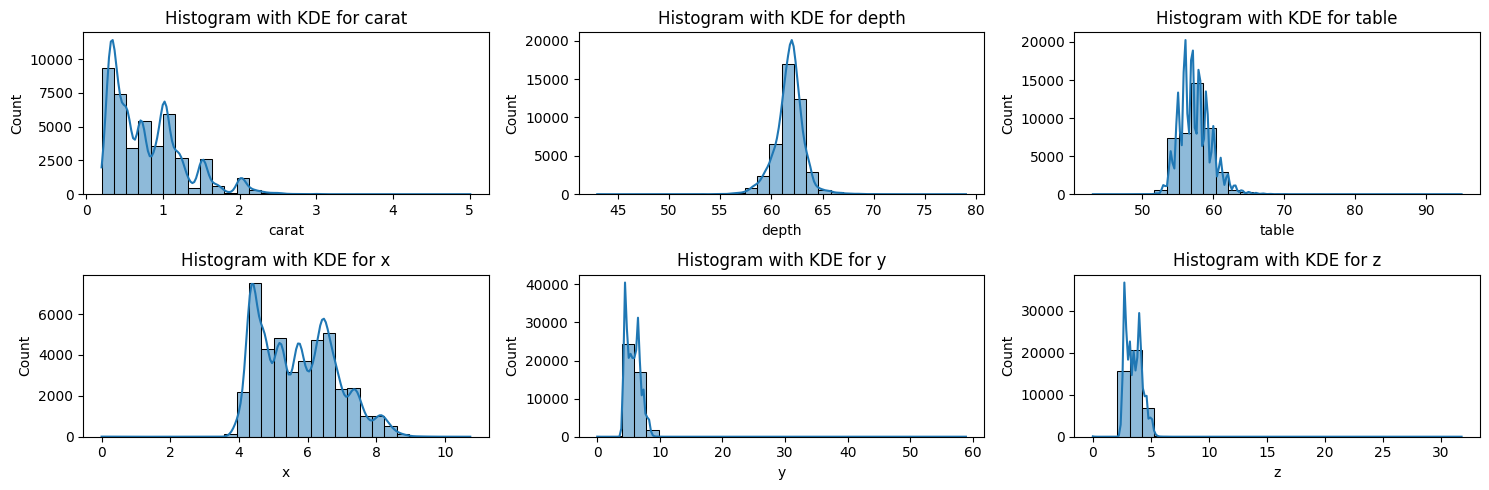

In [14]:
features = ['carat', 'depth', 'table', 'x', 'y', 'z']

# Create subplots
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(15, 5))

# Plot histograms with KDEs for each feature
for i, feature in enumerate(features):
    row = i // 3
    col = i % 3
    sns.histplot(data=df[feature], bins=30, kde=True, ax=axes[row, col])
    axes[row, col].set_title(f'Histogram with KDE for {feature}')

# Adjust layout
plt.tight_layout()
plt.show()

<Axes: xlabel='price', ylabel='Count'>

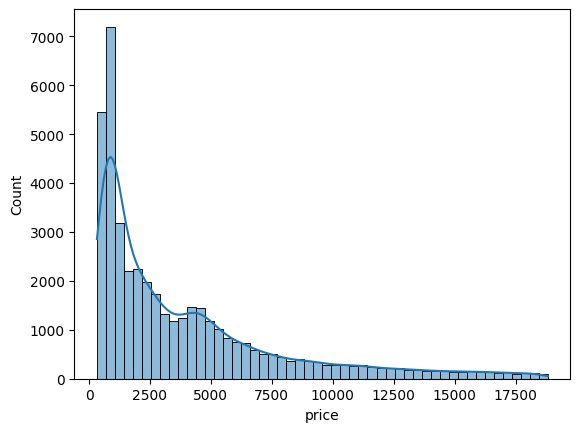

In [15]:
#Note: the distribution of price is left skewed
sns.histplot(df['price'],kde=True,bins=50)

Note: the distribution of price is left skewed

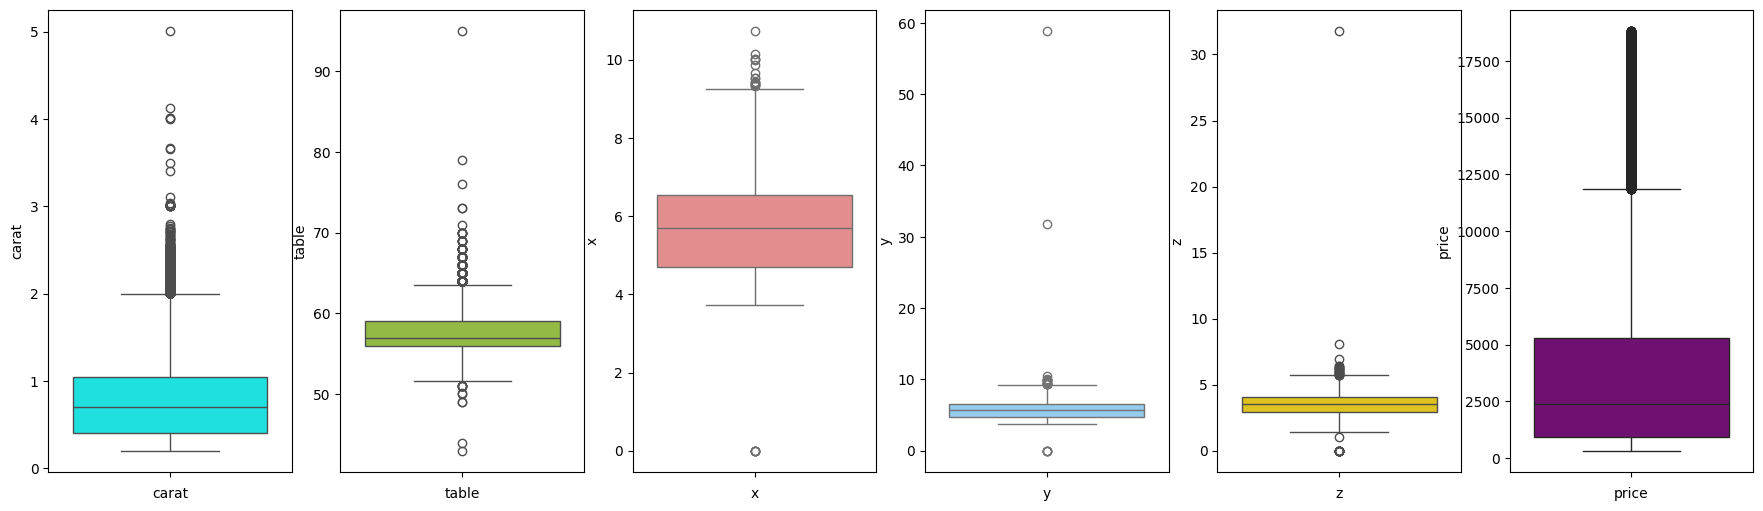

In [16]:
columns = ['carat','table','x','y','z','price']
colors = ['Cyan','yellowgreen', 'lightcoral', 'lightskyblue','gold', 'purple']

fig, ax = plt.subplots(1, 6, figsize=(22, 6))

for i, column in enumerate(columns):
    sns.boxplot(data=df[column], ax=ax[i], color=colors[i])
    ax[i].set_xlabel(columns[i])

plt.show()

Encode ordinal columns (cut, color, clarity)
- cut : Fair, Good, Very Good, Premium, Ideal
- color :  (best) D, E, F, G, H, I, J (worst)
- clarity :(I1 (worst), SI2, SI1, VS2, VS1, VVS2, VVS1, IF (best))

Encode ordinal categorical data

In [17]:

Cut_dictionary = {'Ideal':5, 'Premium':4, 'Very Good':3, 'Fair':1, 'Good':2}
Color_dictionary = {'J':1, 'I':2, 'H':3, 'G':4, 'F':5, 'E':6, 'D':7}
Clarity_dictionary = {'I1':1, 'SI2':2, 'SI1':3, 'VS2':4, 'VS1':5, 'VVS2':6, 'VVS1':7, 'IF':8}

In [18]:
def encode(data):
    df =data.copy()
    df["cut"] = df["cut"].map(Cut_dictionary)
    df["color"] = df["color"].map(Color_dictionary)
    df["clarity"] = df["clarity"].map(Clarity_dictionary)
    return df

In [19]:
df = encode(df)

In [20]:
df.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,1.06,5,2,2,61.8,57.0,4270,6.57,6.60,4.07
1,1.51,4,4,6,60.9,58.0,15164,7.38,7.42,4.51
2,0.32,5,5,4,61.3,56.0,828,4.43,4.41,2.71
3,0.53,5,4,4,61.2,56.0,1577,5.19,5.22,3.19
4,0.70,4,3,6,61.0,57.0,2596,5.76,5.72,3.50


In [21]:
df.describe()

,carat,cut,color,clarity,depth,table,price,x,y,z
count,43152.000000,43152.000000,43152.000000,43152.000000,43152.000000,43152.000000,43152.000000,43152.000000,43152.000000,43152.000000
mean,0.797855,3.904802,4.405752,4.044656,61.747177,57.458347,3929.491912,5.731568,5.735018,3.538568
std,0.473594,1.115213,1.701773,1.649244,1.435454,2.233904,3985.527795,1.121279,1.148809,0.708238
min,0.200000,1.000000,1.000000,1.000000,43.000000,43.000000,326.000000,0.000000,0.000000,0.000000
25%,0.400000,3.000000,3.000000,3.000000,61.000000,56.000000,947.750000,4.710000,4.720000,2.910000
50%,0.700000,4.000000,4.000000,4.000000,61.800000,57.000000,2401.000000,5.700000,5.710000,3.530000
75%,1.040000,5.000000,6.000000,5.000000,62.500000,59.000000,5312.000000,6.540000,6.540000,4.040000
max,5.010000,5.000000,7.000000,8.000000,79.000000,95.000000,18823.000000,10.740000,58.900000,31.800000


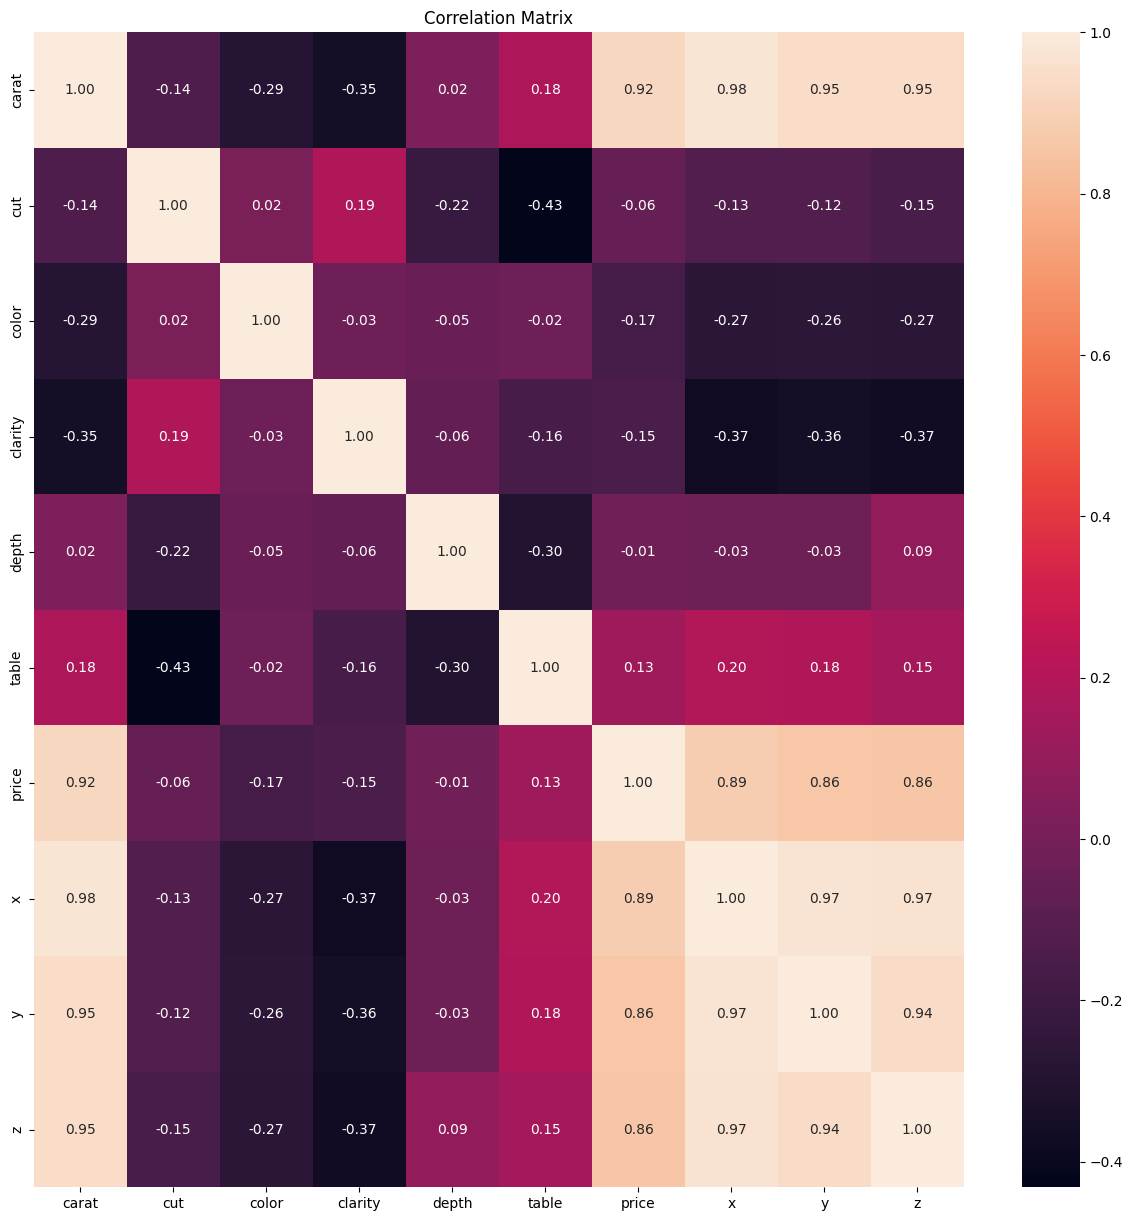

In [22]:
plt.figure(figsize=(15, 15))
sns.heatmap(df.corr(), annot=True, fmt=".2f", annot_kws={"size": 10})
plt.title('Correlation Matrix')
plt.show()

Note : the High relation between:
- Carat, x, y, z, price in pairs
note : low:
- Cut - table

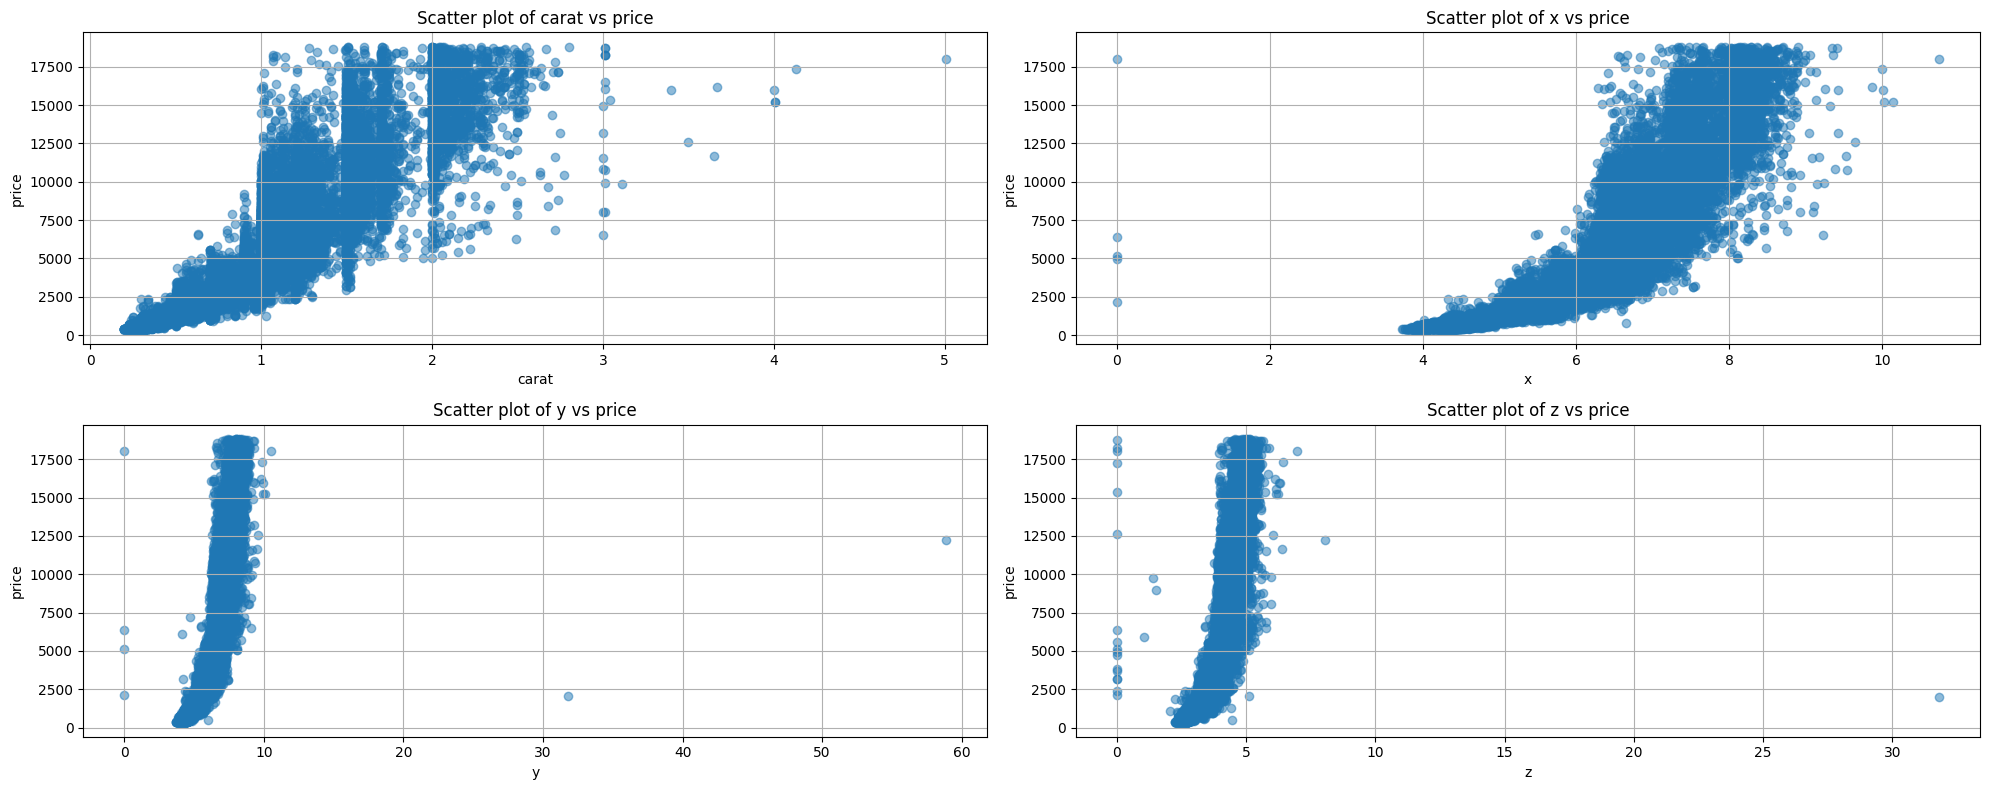

In [23]:
corr_columns = ["carat","x","y","z"]
fig, axs = plt.subplots(2, 2, figsize=(20, 8))
axs = axs.flatten()
# Plot scatter plots for each feature column against the target column
for i, column in enumerate(corr_columns):
    axs[i].scatter(df[column], df['price'], alpha=0.5)
    axs[i].set_title(f'Scatter plot of {column} vs price')
    axs[i].set_xlabel(column)
    axs[i].set_ylabel('price')
    axs[i].grid(True)

# Hide empty subplots
for i in range(len(df.columns), 2 * 2):
    axs[i].axis('off')

plt.tight_layout()
plt.show()

<h1><b>Feature Engineering</b></h1>

In [24]:
#drop null values
df = df.dropna()

# Create new features
df['volume'] = df['x'] * df['y'] * df['z']
df['volume_depth_ratio'] = df['volume'] / df['depth']
df['volume_table_ratio'] = df['volume'] / df['table']

#Remove the uncorrelated features with price
df.drop(['depth', 'cut'], axis = 1, inplace = True)

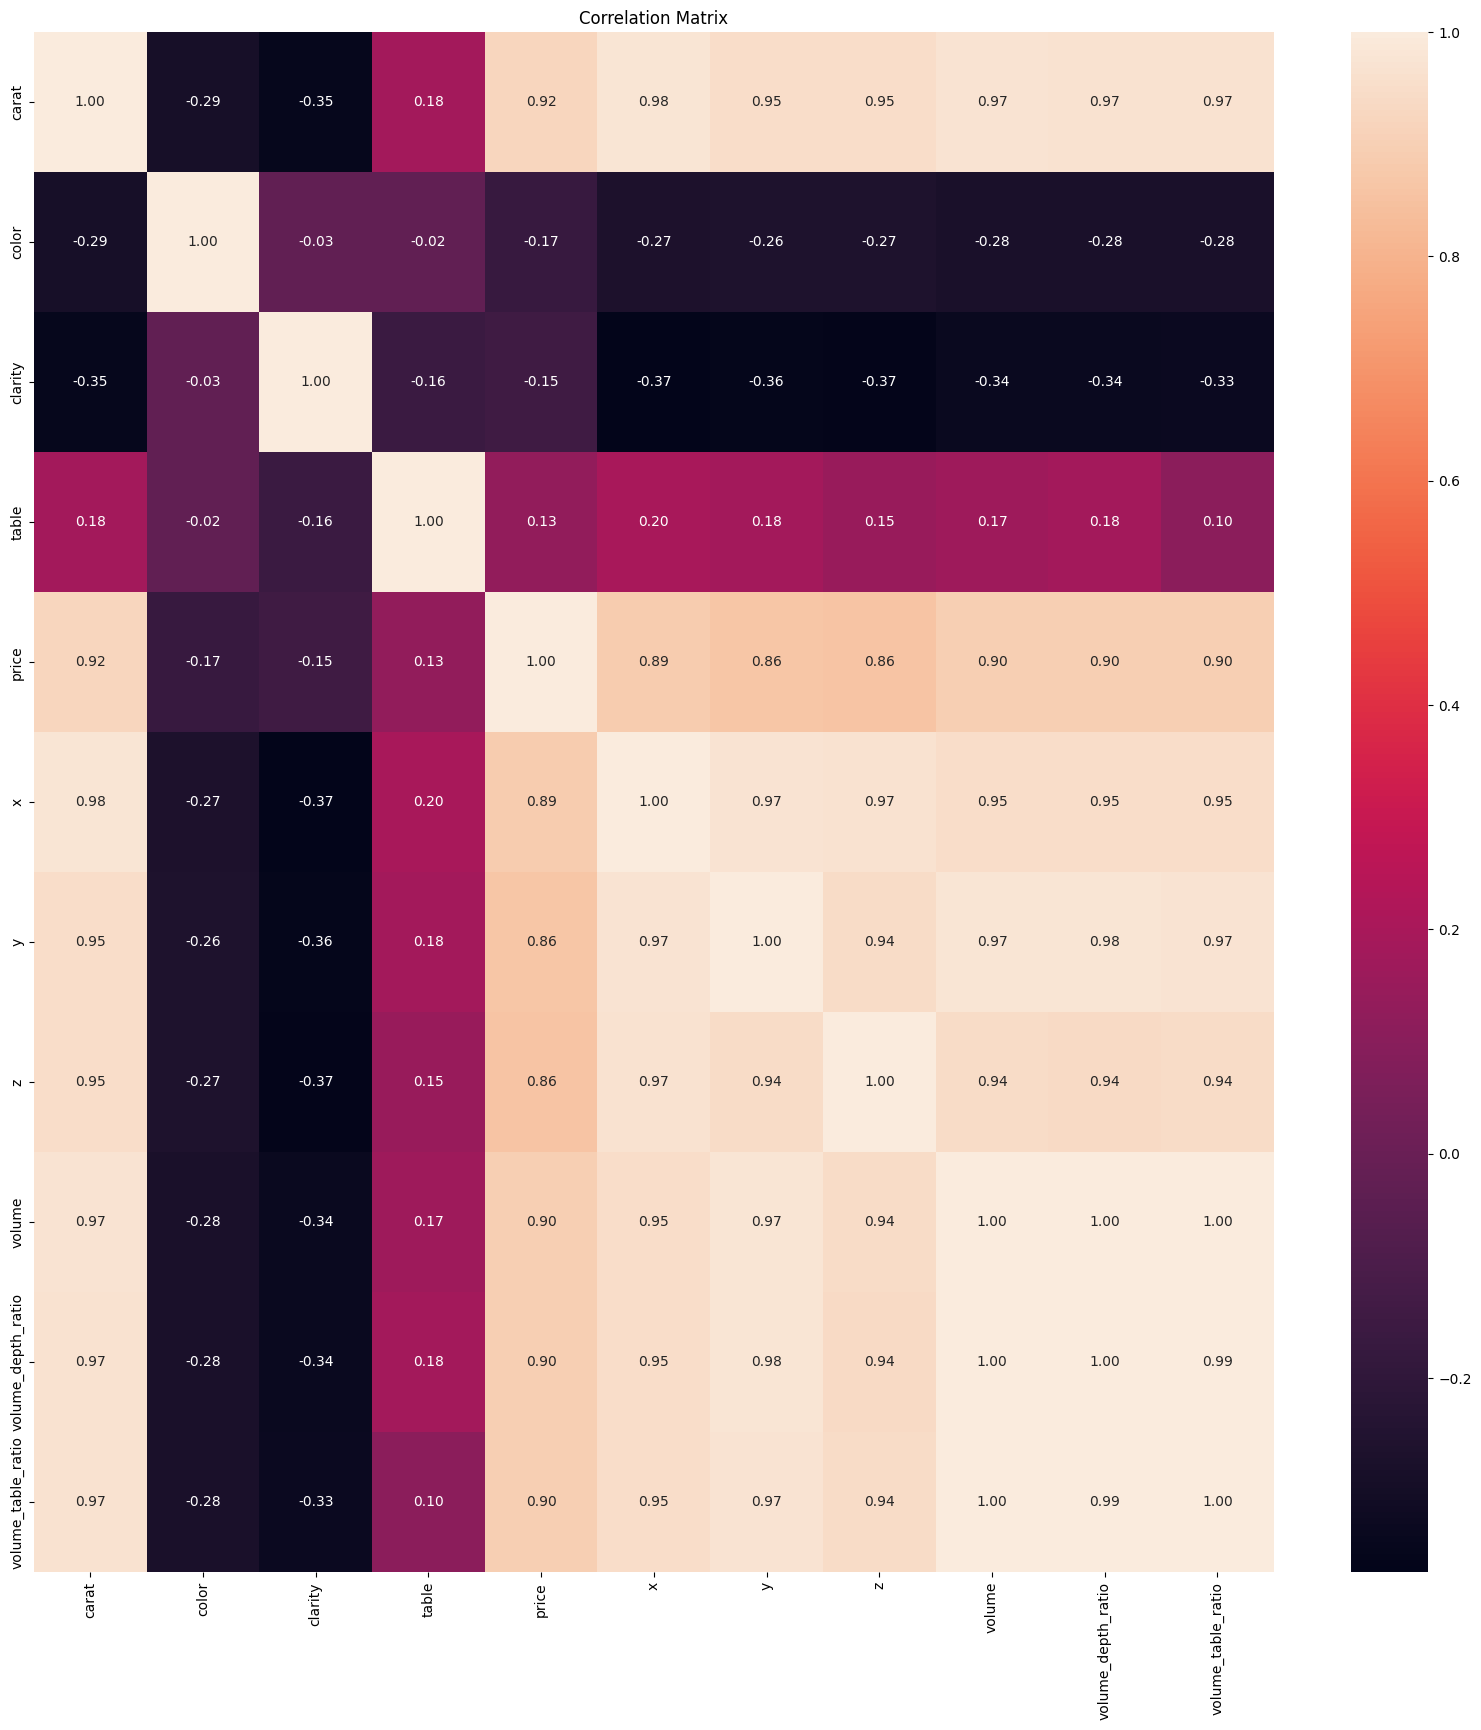

In [25]:
# New features are highly correlated to the prices
plt.figure(figsize=(20, 20))
sns.heatmap(df.corr(), annot=True, fmt=".2f", annot_kws={"size": 10})
plt.title('Correlation Matrix')
plt.show()

<h1><b>Data Preprocessing<b></h1>

In [26]:
#applying of sampling for 'color' and 'clarity' (categorical) features
def oversample_feature(df, feature, desired_percentage):
    # Calculate the total number of samples
    total_samples = len(df)

    # Calculate the desired count for each unique value based on the desired percentage
    desired_count_per_value = int(total_samples * desired_percentage)

    # Create a list containing each unique value in the feature column
    unique_values = sorted(df[feature].unique())

    # Create a dictionary to store the number of occurrences of each value
    value_counts = {value: 0 for value in unique_values}

    # Iterate over each row in the dataframe and update the value counts
    for value in df[feature]:
        value_counts[value] += 1

    # Oversample or undersample the dataframe to match the desired count for each value
    oversampled_dfs = []
    for value in unique_values:
        value_df = df[df[feature] == value]
        current_count = value_counts[value]
        if current_count < desired_count_per_value:
            # Oversample if the count is less than the desired count
            oversampled_df = value_df.sample(n=desired_count_per_value, replace=True, random_state=42)
        elif current_count > desired_count_per_value:
            # Undersample if the count is more than the desired count
            oversampled_df = value_df.sample(n=desired_count_per_value, random_state=42)
        else:
            oversampled_df = value_df.copy()
        oversampled_dfs.append(oversampled_df)

    # Concatenate the oversampled dataframes
    df_resampled = pd.concat(oversampled_dfs)

    return df_resampled

# Apply oversampling for the 'color' feature
df = oversample_feature(df, 'color', 0.1428)

# Apply oversampling for the 'clarity' feature
df = oversample_feature(df, 'clarity', 0.125)

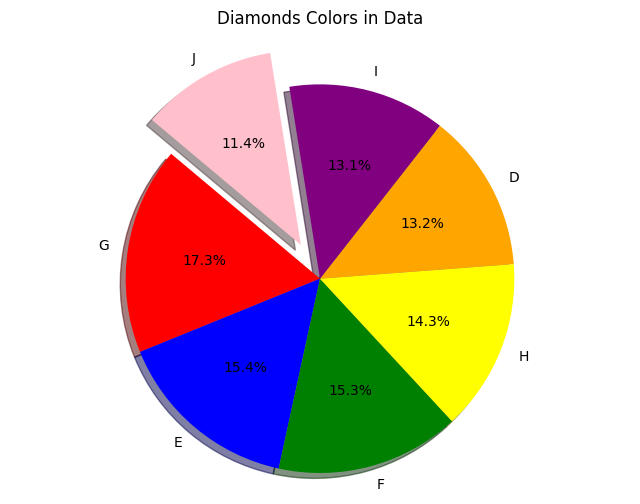

In [27]:
explode = (0, 0, 0, 0, 0, 0, 0.2)  # Explode 2nd slice
colors = ['red', 'blue', 'green', 'yellow', 'orange', 'purple', 'pink']  # Example colors list, adjust as needed

plt.figure(figsize=(8, 6))  # Adjust size if needed
plt.pie(df['color'].value_counts().values, explode=explode, labels=color_count.index, colors=colors[:len(df['color'].value_counts())], autopct='%1.1f%%', shadow=True, startangle=140)

plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.title('Diamonds Colors in Data')
plt.show()

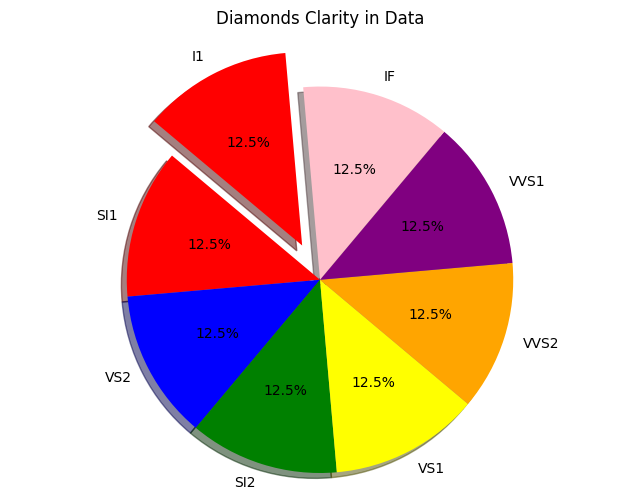

In [28]:
explode = (0, 0, 0, 0, 0, 0, 0, 0.2)  # Explode 2nd slice

plt.figure(figsize=(8, 6))  # Adjust size if needed
plt.pie(df['clarity'].value_counts().values, explode=explode, labels=clarity_count.index, colors=colors[:len(df['clarity'].value_counts())], autopct='%1.1f%%', shadow=True, startangle=140)

plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.title('Diamonds Clarity in Data')
plt.show()

In [29]:
#Applying logarithmic scale to the price to solve the problem of highly left skewed data and small the range of the prices
df['price'] = np.log1p(df['price'])

<Axes: xlabel='price', ylabel='Count'>

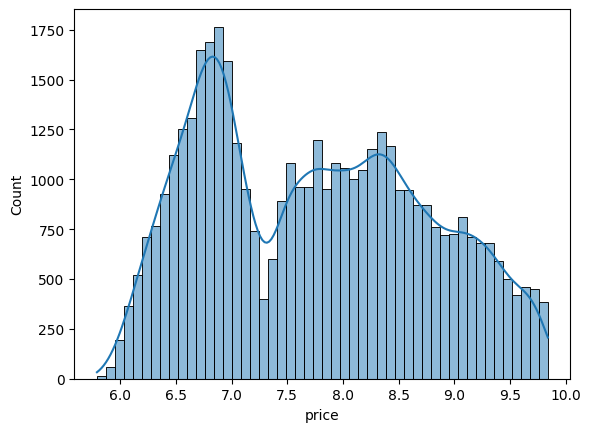

In [30]:
#now the price feature is good now
sns.histplot(df['price'],kde=True,bins=50)

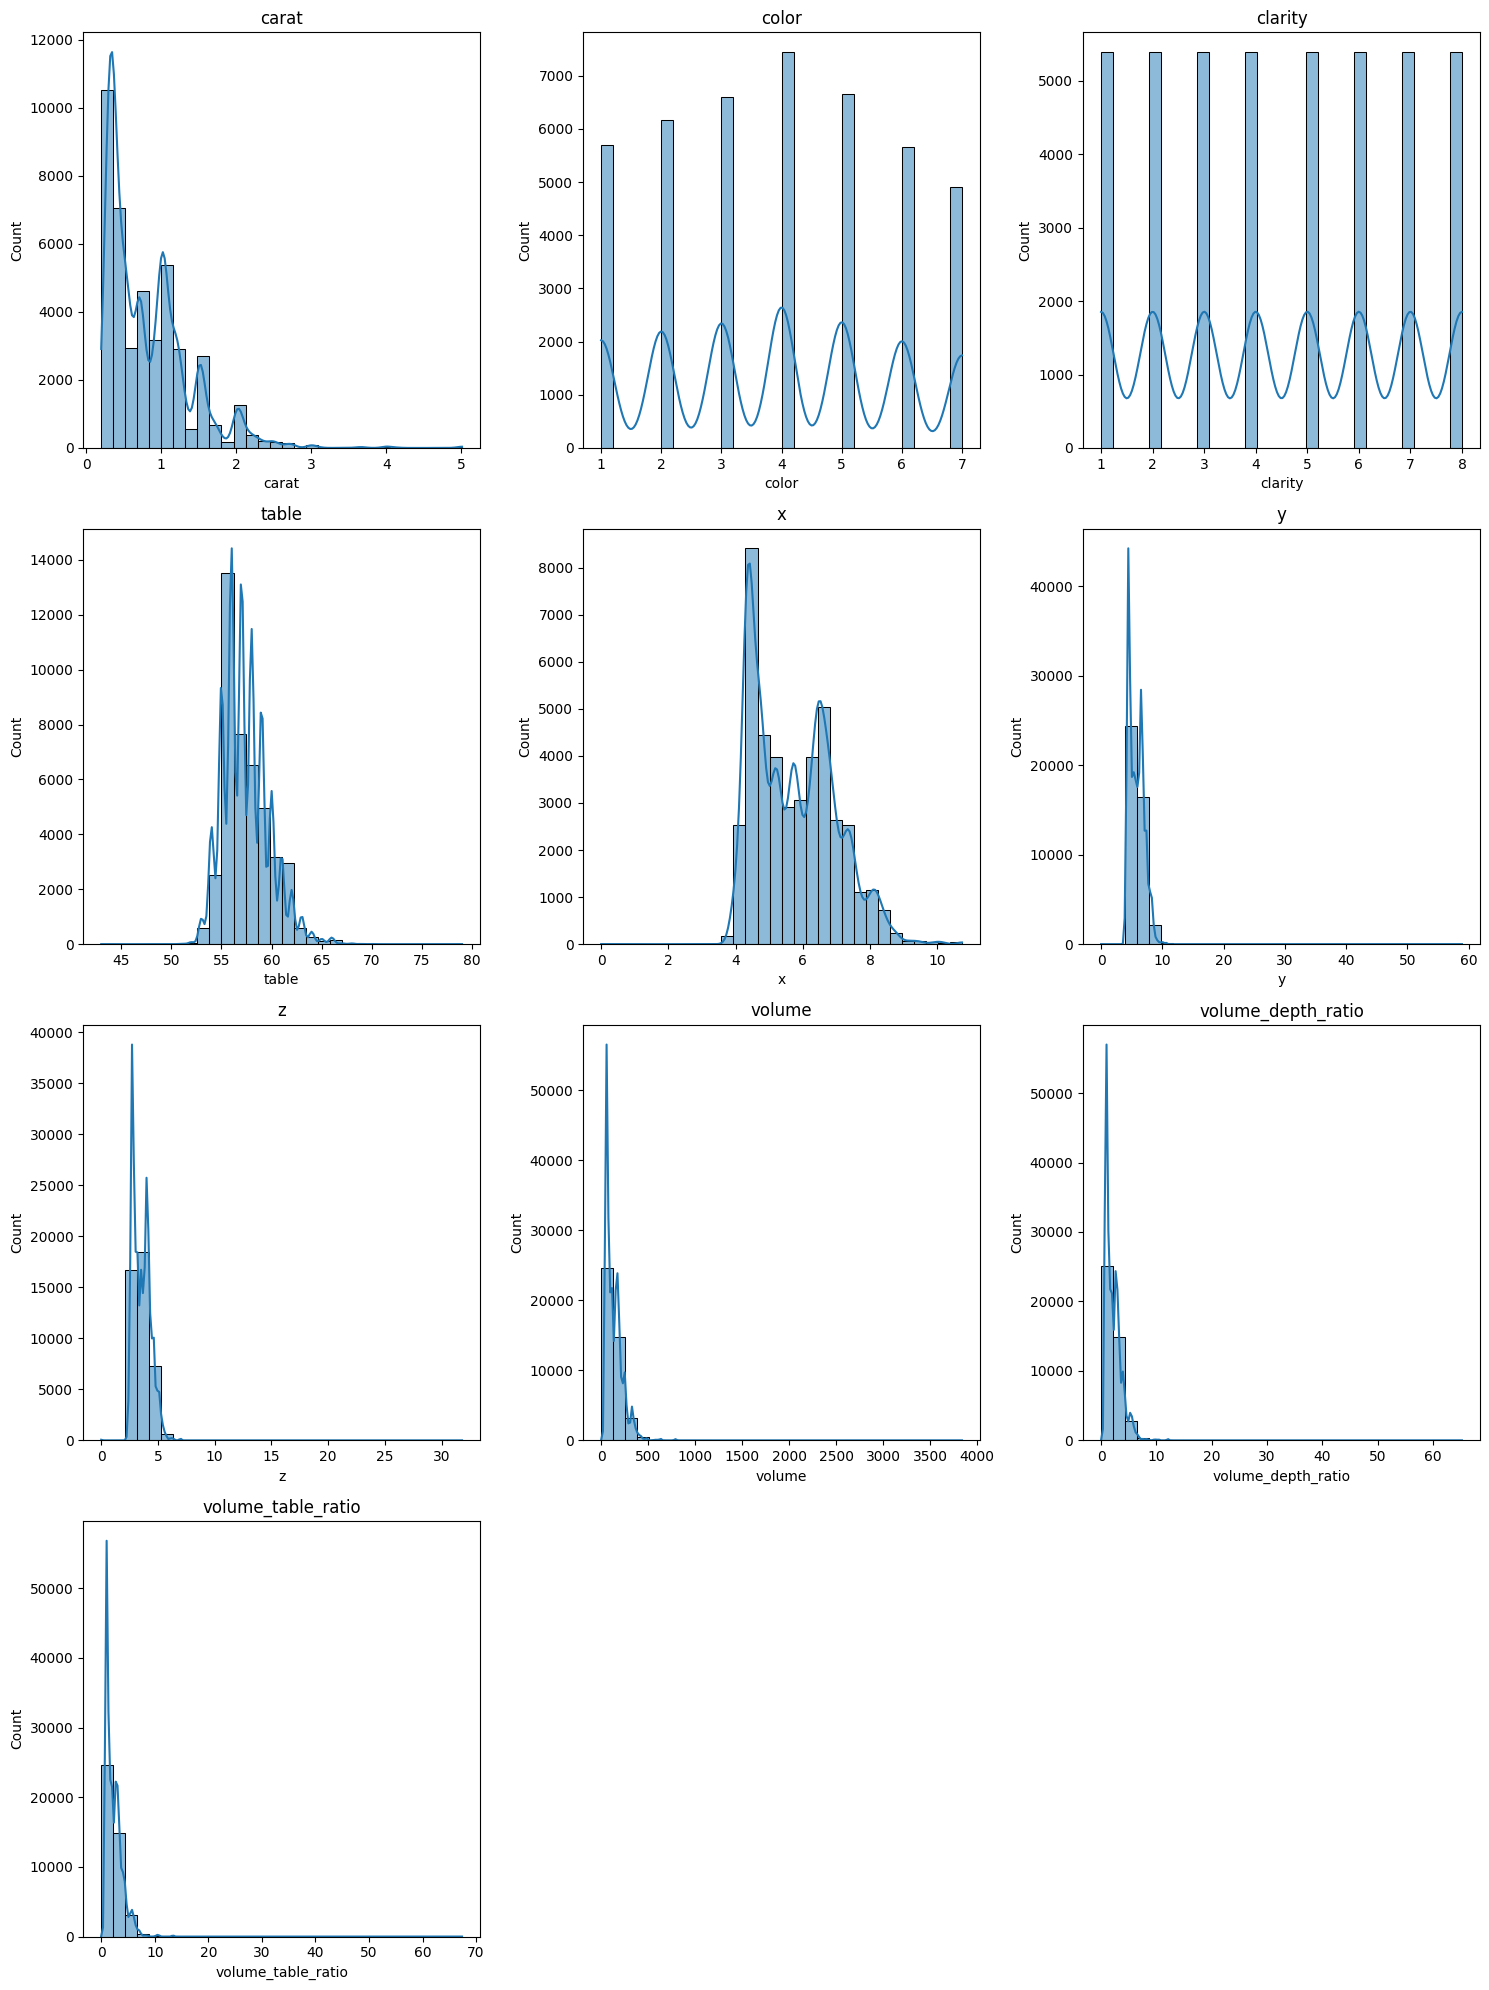

In [31]:
#visualize data with new features features before applying data transformation

features = df.drop('price', axis=1).columns

# Calculate the number of rows and columns needed
num_features = len(features)
num_cols = 3
num_rows = (num_features + num_cols - 1) // num_cols  # Ceiling division

# Create subplots
fig, axes = plt.subplots(nrows=num_rows, ncols=num_cols, figsize=(15, 5 * num_rows))

# Flatten the axes array for easy iteration
axes = axes.flatten()

# Plot histograms with KDEs for each feature
for i, feature in enumerate(features):
    sns.histplot(data=df[feature], bins=30, kde=True, ax=axes[i])
    axes[i].set_title(f'{feature}')

# Remove any empty subplots
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

# Adjust layout
plt.tight_layout()
plt.show()

In [32]:
#applying logarithmic transformation and normalization to train and test features

from sklearn.preprocessing import StandardScaler
import numpy as np

# Log-transform features (excluding 'price', 'color', 'clarity')
log_features = df.drop(['price', 'color', 'clarity'], axis=1).columns
for feature in log_features:
    df[feature] = np.log1p(df[feature])

# Separate 'price', 'color', and 'clarity' columns
df_price = df['price']
df_color = df['color']
df_clarity = df['clarity']

# Select features for normalization (excluding 'price', 'color', 'clarity')
features_for_normalization = df.drop(['price', 'color', 'clarity'], axis=1).columns

# Initialize the StandardScaler
scaler = StandardScaler()

# Fit the scaler to the data
scaler.fit(df[features_for_normalization])

# Transform the data using the scaler
normalized_features = scaler.transform(df[features_for_normalization])

# Convert the scaled data back to a DataFrame
normalized_df = pd.DataFrame(normalized_features, columns=features_for_normalization)

# Reset the index of 'price'
df_price = df_price.reset_index(drop=True)

# Add 'price', 'color', and 'clarity' columns back to the DataFrame
normalized_df['price'] = df_price
normalized_df['color'] = df_color.reset_index(drop=True)
normalized_df['clarity'] = df_clarity.reset_index(drop=True)

# Change type of 'color' and 'clarity' columns to categorical
normalized_df['color'] = normalized_df['color'].astype('category')
normalized_df['clarity'] = normalized_df['clarity'].astype('category')

In [33]:
# it is important to have zero mean for your features
normalized_df.describe()

,carat,table,x,y,z,volume,volume_depth_ratio,volume_table_ratio,price
count,4.312800e+04,4.312800e+04,4.312800e+04,4.312800e+04,4.312800e+04,4.312800e+04,4.312800e+04,4.312800e+04,43128.000000
mean,-1.370737e-16,-1.948028e-15,1.133494e-15,-9.542440e-16,-5.588390e-16,6.010156e-16,4.323094e-16,1.212575e-16,7.745299
std,1.000012e+00,1.000012e+00,1.000012e+00,1.000012e+00,1.000012e+00,1.000012e+00,1.000012e+00,1.000012e+00,1.001382
min,-1.411102e+00,-7.315294e+00,-1.070661e+01,-1.081159e+01,-9.078761e+00,-7.593446e+00,-2.648100e+00,-2.722815e+00,5.789960
25%,-9.189991e-01,-6.142355e-01,-9.352538e-01,-9.351735e-01,-9.329006e-01,-9.314457e-01,-9.301276e-01,-9.382759e-01,6.852243
50%,-1.173909e-01,-1.640217e-01,2.321928e-02,3.103315e-02,3.656647e-02,5.378109e-02,-6.271268e-02,-6.648548e-02,7.723562
75%,6.497424e-01,7.135756e-01,7.835498e-01,7.827099e-01,7.423372e-01,7.716198e-01,7.407497e-01,7.351745e-01,8.530307
max,4.572998e+00,8.160699e+00,3.220093e+00,1.255471e+01,1.201249e+01,5.712088e+00,7.777952e+00,7.625078e+00,9.841399


**Visualize data features after transformation**

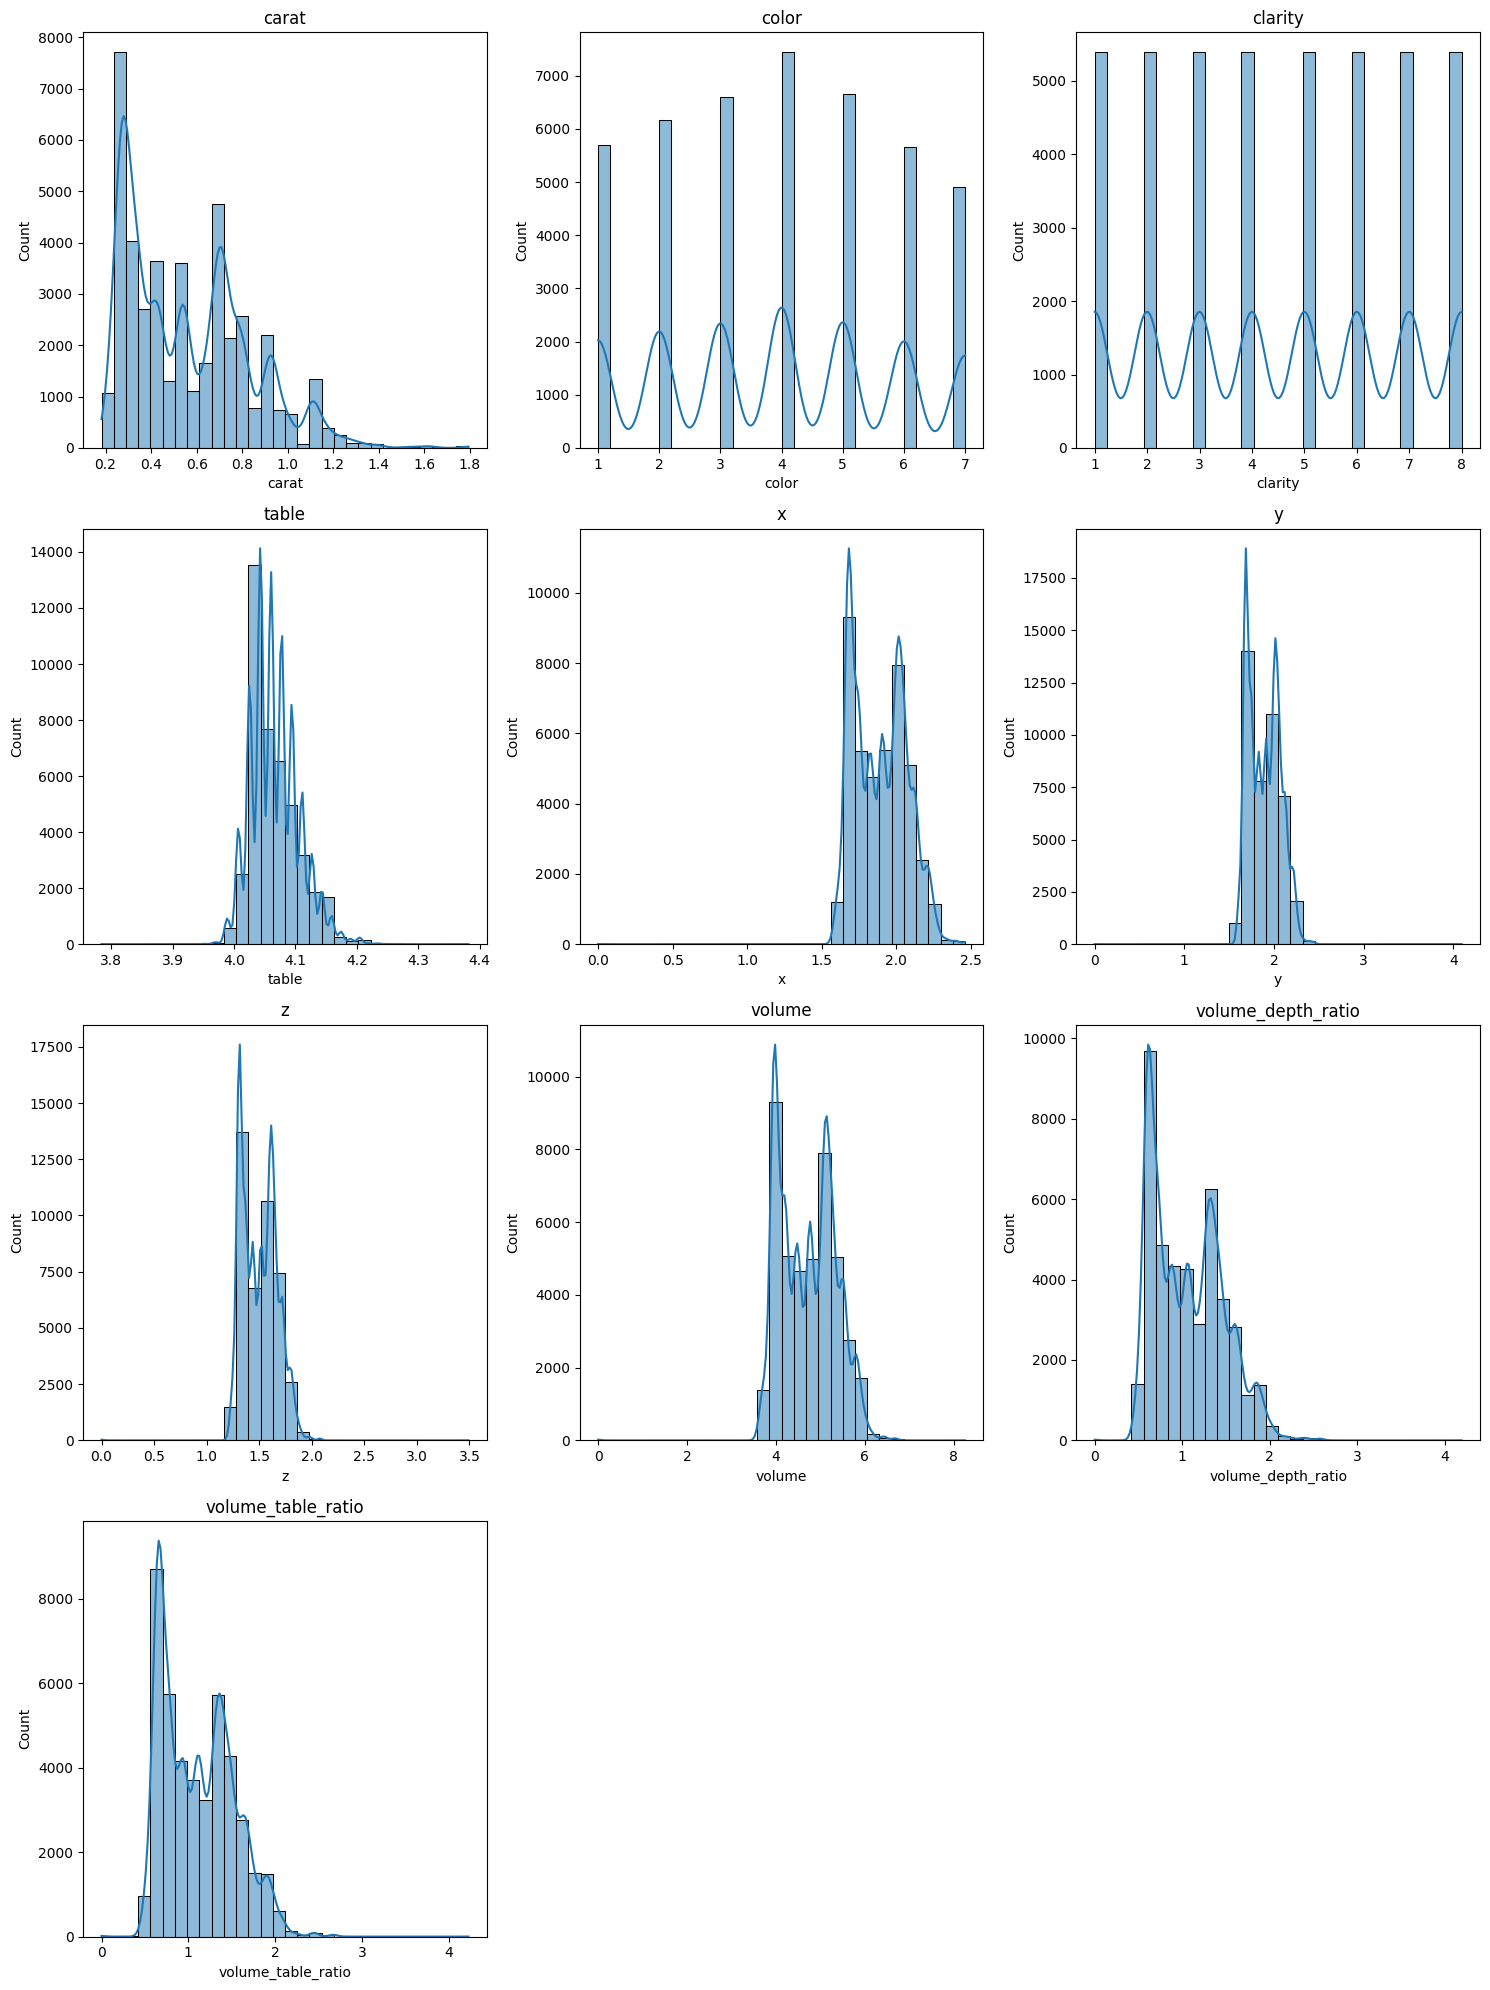

In [34]:
# Visualize training features after transformation

features = df.drop('price', axis=1).columns

# Calculate the number of rows and columns needed
num_features = len(features)
num_cols = 3
num_rows = (num_features + num_cols - 1) // num_cols  # Ceiling division

# Create subplots
fig, axes = plt.subplots(nrows=num_rows, ncols=num_cols, figsize=(15, 5 * num_rows))

# Flatten the axes array for easy iteration
axes = axes.flatten()

# Plot histograms with KDEs for each feature
for i, feature in enumerate(features):
    sns.histplot(data=df[feature], bins=30, kde=True, ax=axes[i])
    axes[i].set_title(f'{feature}')

# Remove any empty subplots
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

# Adjust layout
plt.tight_layout()
plt.show()

**Train model**

In [35]:
from autogluon.tabular import TabularPredictor

predictor = TabularPredictor(label = 'price', eval_metric = 'root_mean_squared_error').fit(train_data = normalized_df, time_limit = 2000, presets = 'best_quality');

No path specified. Models will be saved in: "AutogluonModels/ag-20240521_081847"
Presets specified: ['best_quality']
Setting dynamic_stacking from 'auto' to True. Reason: Enable dynamic_stacking when use_bag_holdout is disabled. (use_bag_holdout=False)
Stack configuration (auto_stack=True): num_stack_levels=1, num_bag_folds=8, num_bag_sets=1
Dynamic stacking is enabled (dynamic_stacking=True). AutoGluon will try to determine whether the input data is affected by stacked overfitting and enable or disable stacking as a consequence.
Detecting stacked overfitting by sub-fitting AutoGluon on the input data. That is, copies of AutoGluon will be sub-fit on subset(s) of the data. Then, the holdout validation data is used to detect stacked overfitting.
Sub-fit(s) time limit is: 2000 seconds.
Starting holdout-based sub-fit for dynamic stacking. Context path is: AutogluonModels/ag-20240521_081847/ds_sub_fit/sub_fit_ho.
Running the sub-fit in a ray process to avoid memory leakage.
Spend 666 second

**get final results**

In [36]:
# Load the submission data
submission = pd.read_csv('test.csv')

# Encode categorical features
submission = encode(submission)

# Create new features
submission['volume'] = submission['x'] * submission['y'] * submission['z']
submission['volume_depth_ratio'] = submission['volume'] / submission['depth']
submission['volume_table_ratio'] = submission['volume'] / submission['table']

# Drop unnecessary columns
submission.drop(['depth', 'cut'], axis=1, inplace=True)

# Log-transform features
log_features = submission.drop(['Id', 'color', 'clarity'], axis = 1).columns
for feature in log_features:
    submission[feature] = np.log1p(submission[feature])

#remove 'color' and 'clarity' from submission to apply transformation
submission_color = submission['color']
submission_clarity = submission['clarity']

# Transform the features using the existing scaler, excluding the 'price' and 'Id' columns
features_for_scaling = submission.drop(['Id', 'color', 'clarity'], axis=1).columns

normalized_features = scaler.transform(submission[features_for_scaling])
normalized_submission = pd.DataFrame(normalized_features, columns=features_for_scaling)

#return back 'color' and 'clarity' columns and convert them to category type
normalized_submission['color'] = submission_color
normalized_submission['clarity'] = submission_clarity

normalized_submission['color'] = normalized_submission['color'].astype('category')
normalized_submission['clarity'] = normalized_submission['clarity'].astype('category')

# Predict prices
predictions = predictor.predict(normalized_submission)

# Get IDs
ID = submission.Id

# Create submission DataFrame
submission_dict = {'ID': ID, 'price': np.expm1(predictions)}
submission = pd.DataFrame(submission_dict)

# Save submission to CSV
submission.to_csv('sub.csv', index=False)